# Model Validation

I want to check if my model is working well before I proceed with sentiment analysis.

This is an unsupervised model, so I will have to manually sample, label, and verify.

In [1]:
import bbcode
import re
import string
import spacy
import json

import nltk

import gensim
from gensim.models import LdaMulticore
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora, models, similarities

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import steamreviews
import datetime

unable to import 'smart_open.gcs', disabling that module
C:\Users\Henry\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#initialise model and dataset

#load dataset, which was previously cleaned in Modelling 3rd Run
model2_df = pd.read_csv('./dataframes/model2_df.csv',index_col=0)

#reload model
lda_model = LdaMulticore.load('./models/nouns_only/model3/model3.model')

In [3]:
model_topics = lda_model.show_topics(formatted=False)
for line in lda_model.print_topics(num_words=15):
    print(str(line)+'\n')

(0, '0.082*"story" + 0.028*"graphic" + 0.018*"rockstar" + 0.018*"character" + 0.017*"experience" + 0.016*"gameplay" + 0.014*"bug" + 0.013*"world" + 0.012*"open_world" + 0.012*"single_player" + 0.011*"story_mode" + 0.010*"red_dead_redemption_two" + 0.010*"mission" + 0.009*"pc" + 0.008*"year"')

(1, '0.038*"pc" + 0.035*"crash" + 0.030*"issue" + 0.024*"problem" + 0.021*"setting" + 0.017*"steam" + 0.017*"rockstar" + 0.014*"performance" + 0.013*"fix" + 0.012*"run" + 0.010*"optimization" + 0.010*"error" + 0.010*"launch" + 0.009*"graphic" + 0.009*"rockstar_launcher"')

(2, '0.041*"horse" + 0.019*"way" + 0.018*"people" + 0.018*"mission" + 0.016*"character" + 0.013*"story" + 0.011*"gun" + 0.011*"weapon" + 0.011*"world" + 0.010*"animal" + 0.009*"control" + 0.009*"man" + 0.008*"player" + 0.007*"action" + 0.007*"animation"')

(3, '0.037*"mission" + 0.023*"player" + 0.023*"server" + 0.019*"bug" + 0.019*"rockstar" + 0.018*"money" + 0.015*"hacker" + 0.014*"friend" + 0.013*"camp" + 0.013*"problem" + 0

In [4]:
model2_df.head()

,timestamp_created,review,clean_reviews,3gram_reviews,3grams_nouns,3grams_nouns_verbs,3grams_nouns_v2
0,1586657138,"Online review only...Simply put, it sucks ass....","['online', 'review', 'simply', 'sucks', 'ass',...","['online', 'review', 'simply', 'sucks', 'ass',...","['review', 'ass', 'minute', 'camp', 'bug', 'mo...","['review', 'suck', 'ass', 'glitche', 'minute',...","['review', 'ass', 'minute', 'camp', 'bug', 'mo..."
1,1586656937,It's a wonderful multiplayer and singleplayer ...,"['wonderful', 'multiplayer', 'singleplayer', '...","['wonderful', 'multiplayer', 'singleplayer', '...","['connection_issues', 'friend']","['connection_issues', 'recommend', 'recommend'...","['connection_issues', 'friend']"
2,1586656864,People claim a lot in reviews that they cant r...,"['people', 'claim', 'reviews', 'run', 'works',...","['people', 'claim', 'reviews', 'run', 'works_f...","['people', 'review', 'works_fine', 'time', 'pc...","['people', 'claim', 'review', 'run', 'works_fi...","['people', 'review', 'works_fine', 'pc', 'spec..."
3,1586655683,"Best fucking story I have ever played, online'...","['best', 'fucking', 'story', 'played', 'online...","['best', 'fucking', 'story', 'played', 'online...",['story'],"['story', 'play']",['story']
4,1586655188,well made game lots of fun,"['lots', 'fun']",['lots_fun'],['lots_fun'],['lots_fun'],['lots_fun']


In [5]:
#Turn data from strings back into lists (only for the lists we want to use)
model2_df['clean_reviews'] = model2_df['clean_reviews'].map(lambda x: ''.join(c for c in x if c=='_' or c not in string.punctuation).split())
model2_df['3grams_nouns_v2'] = model2_df['3grams_nouns_v2'].map(lambda x: ''.join(c for c in x if c=='_' or c not in string.punctuation).split()) 

In [6]:
documents = list(model2_df['3grams_nouns_v2'])
dictionary = gensim.corpora.Dictionary(documents)

#IMPORTANT! If you filtered extremes when CREATING the model, you must give it back EXACTLY the same dictionary or else it may not work with lda_model[corpus]!

dictionary_saved = gensim.corpora.Dictionary.load('./models/nouns_only/model3/model3.model.id2word') #this dictionary already had filter_extremes() applied during training step 

corpus = [dictionary_saved.doc2bow(text) for text in documents]

In [7]:
topic_list = lda_model.print_topics(num_topics=5, num_words=15)
for index, i in enumerate(topic_list):
    str1 = str(i[1])
    for c in "0123456789+*\".":
        str1 = str1.replace(c, "")
    str1 = str1.replace("  ", " ")
    print(str1)

story graphic rockstar character experience gameplay bug world open_world single_player story_mode red_dead_redemption_two mission pc year
pc crash issue problem setting steam rockstar performance fix run optimization error launch graphic rockstar_launcher
horse way people mission character story gun weapon world animal control man player action animation
mission player server bug rockstar money hacker friend camp problem single_player people session gold online_mode


In [8]:
#credit to https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/ for this cell's code, which I modified to suit my needs

topic_dict = {'0':'Gaming Experience',
              '1':'Bugs & Issues',
              '2':'Game Content & Design',
              '3':'Online Mode'
             }

#created a dictionary so I can show topic names instead of numbers, without any complicated code

def format_topics_sentences(ldamodel=lda_model, corpus=corpus, documents=documents):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([topic_dict[str(topic_num)], round(prop_topic,4), topic_keywords]), ignore_index=True)   #replaced int(topic_num) with
                
            else:
                break
                
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    orig_contents = pd.Series(model2_df['review'])
    docs = pd.Series(documents)
    sent_topics_df = pd.concat([sent_topics_df,docs, orig_contents], axis=1)
    return(sent_topics_df)

In [9]:
#generate dataframe
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, documents=documents)

In [12]:
len(df_dominant_topic)

4836

In [11]:
# Format dataframe
df_dominant_topic = df_topic_sents_keywords.reset_index()

df_dominant_topic.columns = ['document_no', 'dominant_topic', 'topic_perc_contrib', 'keywords', 'tokens','original_text']

df_dominant_topic['num_tokens']=df_dominant_topic['tokens'].map(lambda x: len(x))

df_dominant_topic['unique_tokens']=df_dominant_topic['tokens'].map(lambda x: list(set(x)))
df_dominant_topic['num_unique_tokens']=df_dominant_topic['unique_tokens'].map(lambda x: len(x))

df_dominant_topic = df_dominant_topic[['dominant_topic','original_text','topic_perc_contrib','tokens','num_tokens','unique_tokens','num_unique_tokens','keywords']]


# Show dataframe
df_dominant_topic.head(10)

,dominant_topic,original_text,topic_perc_contrib,tokens,num_tokens,unique_tokens,num_unique_tokens,keywords
0,Online Mode,"Online review only...Simply put, it sucks ass....",0.6938,"[review, ass, minute, camp, bug, money, infini...",18,"[hell, lose, completion, gold_bars, gold, miss...",18,"mission, player, server, bug, rockstar, money,..."
1,Gaming Experience,It's a wonderful multiplayer and singleplayer ...,0.4671,"[connection_issues, friend]",2,"[friend, connection_issues]",2,"story, graphic, rockstar, character, experienc..."
2,Bugs & Issues,People claim a lot in reviews that they cant r...,0.5045,"[people, review, works_fine, pc, spec, ram, ne...",11,"[60_hours, need, works_fine, review, people, p...",11,"pc, crash, issue, problem, setting, steam, roc..."
3,Gaming Experience,"Best fucking story I have ever played, online'...",0.6944,[story],1,[story],1,"story, graphic, rockstar, character, experienc..."
4,Gaming Experience,well made game lots of fun,0.6944,[lots_fun],1,[lots_fun],1,"story, graphic, rockstar, character, experienc..."
5,Gaming Experience,Fantastic experience. Did not play online.\nGo...,0.8239,"[experience, atmosphere, character, storyline,...",14,"[character, surround, atmosphere, experience, ...",12,"story, graphic, rockstar, character, experienc..."
6,Bugs & Issues,Rockstar Games did a good job at rushing with ...,0.7916,"[rockstar_games, pc_version, constant_crashing...",9,"[constant_crashing, experience, rockstar_games...",9,"pc, crash, issue, problem, setting, steam, roc..."
7,Gaming Experience,"The Perfect Game. It has everything it needs, ...",0.9314,"[story, gameplay, voice_acting, character, ope...",8,"[character, music, voice_acting, house, story,...",8,"story, graphic, rockstar, character, experienc..."
8,Gaming Experience,"Single player is a blast. Dunno about online, ...",0.8463,"[single_player, blast, ass]",3,"[blast, single_player, ass]",3,"story, graphic, rockstar, character, experienc..."
9,Gaming Experience,It is the best game ever it was fun and you co...,0.3896,[experince],1,[experince],1,"story, graphic, rockstar, character, experienc..."


In [13]:
df_dominant_topic.tail(10)

,dominant_topic,original_text,topic_perc_contrib,tokens,num_tokens,unique_tokens,num_unique_tokens,keywords
4826,Gaming Experience,8/10 \n+Music\n+Graphic\n+Story\n+Sound\n-Bugs...,0.8769,"[music, story, sound, bug]",4,"[story, sound, music, bug]",4,"story, graphic, rockstar, character, experienc..."
4827,Bugs & Issues,Game doesn't even launch. Receive an error tha...,0.8407,"[error, rdr2, exited_unexpectedly, rockstar, e...",11,"[rockstar, plug, unplug_controller, exited_une...",11,"pc, crash, issue, problem, setting, steam, roc..."
4828,Bugs & Issues,Its been four months and this game is still an...,0.9611,"[month, piece, garbage, 1080_ti, 8700k, 16gb_r...",22,"[piece, resolution, ultra_settings, 60_fps, me...",20,"pc, crash, issue, problem, setting, steam, roc..."
4829,Bugs & Issues,"Nothing, just wanna comment lol.\nFinally a de...",0.5759,"[suck, crash, three_times, bug, performance, bug]",6,"[suck, crash, performance, bug, three_times]",5,"pc, crash, issue, problem, setting, steam, roc..."
4830,Bugs & Issues,Thanks for the beta test epic fan boys.,0.3676,"[test, fan, boy]",3,"[test, fan, boy]",3,"pc, crash, issue, problem, setting, steam, roc..."
4831,Gaming Experience,it's time to find gavin,0.3896,[],0,[],0,"story, graphic, rockstar, character, experienc..."
4832,Bugs & Issues,When this game frist came on PS4 I bought it i...,0.8128,"[pc, master, race]",3,"[pc, race, master]",3,"pc, crash, issue, problem, setting, steam, roc..."
4833,Online Mode,Its definetly getting better. less bugs than o...,0.5960,"[bug, launch, single_player_mode, online_mode]",4,"[launch, online_mode, single_player_mode, bug]",4,"mission, player, server, bug, rockstar, money,..."
4834,Bugs & Issues,"Beautiful game, wish it didn't run like shit e...",0.6292,[shit],1,[shit],1,"pc, crash, issue, problem, setting, steam, roc..."
4835,Bugs & Issues,Although it is a 60$ game after years of relea...,0.9254,"[year, release, month, pc, decided_buy, steam,...",11,"[steam, month, r, fix, bug, pc, release, decid...",9,"pc, crash, issue, problem, setting, steam, roc..."


### Topic Misclassification

As this is an unsupervised learning method, the risk of misclassification is quite significant. 

A preview of the results seems quite satisfactory, but short documents tend to have their tropics classified incorrectly... and most reviews on Steam are very short (as established in EDA).

This is why I ran the LDA multiple times, looking for clear topic separation in addition to topics coherent to a human user.

It could be worth exploring the rates of misclassifcation associated with the number of tokens present in the document.

Idea:
    - Get all documents with 5 or fewer tokens
    - Randomly sample 200 documents from the total of those with 5 or fewer tokens and manually label them as correct or wrong
    - Get misclassification rates by token count and find a good cutoff
    - Exclude the group(s) with the highest misclassficiation rates


In [14]:
check_tokens = df_dominant_topic['num_tokens'].median() #middle point of the token count data will be the cutoff

In [15]:
# get all documents with num_token equal to median or fewer of the dataset.

tokens_df = df_dominant_topic[df_dominant_topic['num_tokens']<=check_tokens]
tokens_df.head()

,dominant_topic,original_text,topic_perc_contrib,tokens,num_tokens,unique_tokens,num_unique_tokens,keywords
1,Gaming Experience,It's a wonderful multiplayer and singleplayer ...,0.4671,"[connection_issues, friend]",2,"[friend, connection_issues]",2,"story, graphic, rockstar, character, experienc..."
3,Gaming Experience,"Best fucking story I have ever played, online'...",0.6944,[story],1,[story],1,"story, graphic, rockstar, character, experienc..."
4,Gaming Experience,well made game lots of fun,0.6944,[lots_fun],1,[lots_fun],1,"story, graphic, rockstar, character, experienc..."
8,Gaming Experience,"Single player is a blast. Dunno about online, ...",0.8463,"[single_player, blast, ass]",3,"[blast, single_player, ass]",3,"story, graphic, rockstar, character, experienc..."
9,Gaming Experience,It is the best game ever it was fun and you co...,0.3896,[experince],1,[experince],1,"story, graphic, rockstar, character, experienc..."


In [16]:
#check class balance
cls_bal = tokens_df['dominant_topic'].value_counts(normalize=True)
print(cls_bal)

Gaming Experience        0.648616
Bugs & Issues            0.184446
Game Content & Design    0.090798
Online Mode              0.076140
Name: dominant_topic, dtype: float64


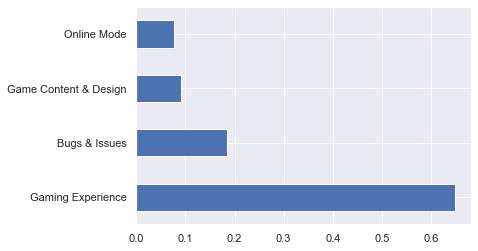

In [17]:
cls_bal.plot(kind='barh')

In [18]:
#There appears to be significant class imbalance. However, this isn't necessarily due to misclassification. 
#Most reviews are expected to talk about how a game lives up to the series it is from.
#will sample assuming equal probability first, seeing as the topics are not all confirmed to be correctly classified.

sample_tokens_df = tokens_df.sample(frac=0.1,random_state=1337) #take 10% of the data and sample it (according to http://www.raosoft.com/samplesize.html, 193 samples give ~7% margin of error)
sample_tokens_df.head()

,dominant_topic,original_text,topic_perc_contrib,tokens,num_tokens,unique_tokens,num_unique_tokens,keywords
1530,Gaming Experience,"It's Red Dead Redemption 2, if you don't like ...",0.6930,[red_dead_redemption_two],1,[red_dead_redemption_two],1,"story, graphic, rockstar, character, experienc..."
4381,Bugs & Issues,the game has a few graphical issues but other ...,0.6193,"[issue, port, launch, issues_fixed]",4,"[launch, issues_fixed, issue, port]",4,"pc, crash, issue, problem, setting, steam, roc..."
684,Bugs & Issues,"It finally works, crash here and there but bef...",0.8145,"[crash, launch, max_settings]",3,"[crash, launch, max_settings]",3,"pc, crash, issue, problem, setting, steam, roc..."
1053,Gaming Experience,So far 4 hrs in its perfectly rockstar no more...,0.7925,"[rockstar, open_world_games]",2,"[open_world_games, rockstar]",2,"story, graphic, rockstar, character, experienc..."
432,Bugs & Issues,"After a bit of work to get it running well, th...",0.6037,[work],1,[work],1,"pc, crash, issue, problem, setting, steam, roc..."


In [19]:
sample_tokens_df.to_csv('./dataframes/sample_tokens_df.csv')

In [20]:
#It seems that cumulatively, having 2 tokens and above will give lower misclassification rates (~25% as compared to above 35% for 1 token and below)
#Let's inspect the labelled dataframe and inspect num_tokens at the percentile levels
df_dominant_topic.describe()

,topic_perc_contrib,num_tokens,num_unique_tokens
count,4836.000000,4836.000000,4836.000000
mean,0.669461,10.438792,9.175765
std,0.168118,19.433182,14.994260
min,0.303000,0.000000,0.000000
25%,0.539275,2.000000,2.000000
50%,0.692100,4.000000,4.000000
75%,0.796400,11.000000,10.000000
max,0.987200,319.000000,197.000000


In [21]:
#num_tokens 25th percentile is 2 -- we will have to sacrifice 25% of our dataset in order to use only data that is likely to be classified correctly 
#get class balance; we are going to check the labelling later
df_dominant_topic['dominant_topic'].value_counts(normalize=True)

Gaming Experience        0.522126
Bugs & Issues            0.248139
Game Content & Design    0.115178
Online Mode              0.114557
Name: dominant_topic, dtype: float64

### Findings from the Samples

**General Findings**
- Long reviews tend to cover multiple topics. 
    - Classifying a whole review as being about one topic is one way of doing things, but it could mean wasted opportunities.
    - Could be worth analysing the dataset by sentences.</br></br>

**Sample with num_tokens <=5:**
- The cumulative misclassficiation rate of the low token count sample is between 20% (5 tokens) and 60% (0 tokens), which I can accept for text analysis...
    - ... for the Internet is dark and full of errors. 

A classification rate of around 80% classification success rate from an unsupervised model seems quite usable. 


**Sample with any number of tokens:**
- Overall classification accuracy of sample (10% of the whole dataset) is around 86%, which I find quite acceptable. 
    - The rate should be approximately the same for the whole dataset 
    - 5% margin of error according to http://www.raosoft.com/samplesize.html </br></br>
    
- 1 or fewer tokens dropped
    - Misclassification rate drops from ~14.8% to ~13.6%. 
    - We sacrifice 13.7% of the usable data. 
    - Possibly a worthy tradeoff. </br></br>
    
- 2 or fewer tokens dropped
    - Misclassification rate drops from ~13.6% to ~12.5%. 
    - However, we sacrifice 27.6% of the usable data. 
    - The loss of data is too severe to for this to be a worthy tradeoff. </br></br>

**NEXT STEPS**

- Remove reviews that have 0 or 1 tokens from the dataset
    - AFTER sentiment analysis 
    - model was trained on this dataset
    - Low token count reviews should be dropped only after all the model has been reloaded and topic assignment has been done (retroactively discovered this)
- Analyse the entire corpus by sentences instead of by document.
    - This way, there will be more data overall; long reviews can be broken down into parts that talk about different topics. 
- The resulting topics and sentiments can be grouped together for a more accurate overview of player sentiment overall, rather than sentiment for the dominant topic of each document

In [457]:
#Remove reviews with 1 or 0 tokens

#df_dominant_topic2=df_dominant_topic[df_dominant_topic['num_tokens']>1]

#Find out what proportion of reviews were dropped
#rows_removed = abs(len(df_dominant_topic)-len(df_dominant_topic2))/len(df_dominant_topic)
#print(rows_removed)

0.15542201584266593


In [458]:
#Get number of reviews remaining

#len(df_dominant_topic2)

3092

In [22]:
# df_dominant_topic2.to_csv('./dataframes/dominant_topics.csv')
df_dominant_topic.to_csv('./dataframes/dominant_topics.csv')

In [462]:
len(df_dominant_topic)

3661